In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Congress = pd.read_csv('CONG.csv')
Congress = Congress.set_index('Congresista', drop=True)

In [3]:
Congress.loc["Luna Gálvez José León", 'Votación']= 69538

In [4]:
Congress = Congress.replace('AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL', 'AVANZA PAÍS')
Congress = Congress.replace('ACCION POPULAR', 'ACCIÓN POPULAR')

In [5]:
Congress.groupby('Región')['Votación'].sum().sum()

2351793

In [6]:
Congress = Congress.rename(columns={'Representatividad':'Rel_rep'})
Congress['Rep_abs'] = Congress['Votación']/2351793
#Something is wrong here, i can feel it
#Ok, I got it, this only counts the votes of representatives that got to congress, 
#not all of them, that would be a better metric

In [7]:
#Make the number of congres a column and making a df of region, bancada, rep abs y numcong
regions_numbers = Congress.groupby('Región')['Rep_abs'].count().sort_values()
pre_total_rep = Congress[['Región', 'Bancada', 'Rep_abs', 'Votación']].merge(regions_numbers, on='Región', how='left')


## Sub-representación en regiones

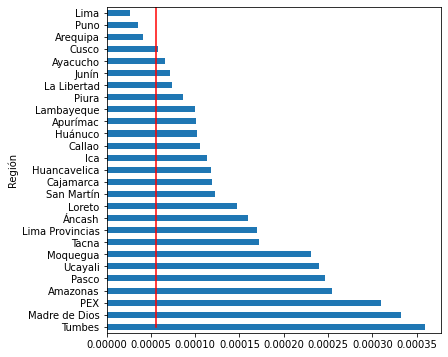

In [8]:
#Gets rep divided by number of cong
pre_total_rep['total_rep'] = pre_total_rep['Rep_abs_x']/pre_total_rep['Rep_abs_y']
rep_vs = pre_total_rep.groupby('Región')['total_rep'].sum().sort_values()**-1/2351793
rep_vs.plot(kind='barh', figsize=(6, 6))
#Plot desired representativity
x = 130/2351793
plt.plot([x, x],[0, 30], c='r')

## Representatividad absoluta distribuida media por bancada
Representatividad absoluta distribuida = (Votación)/(Población_Total*Número_de_escaños).
En este cociente, se verán beneficiadas las bancadas que ganaron escaños en distritos electorales sobre-representados.

<AxesSubplot:ylabel='Bancada'>

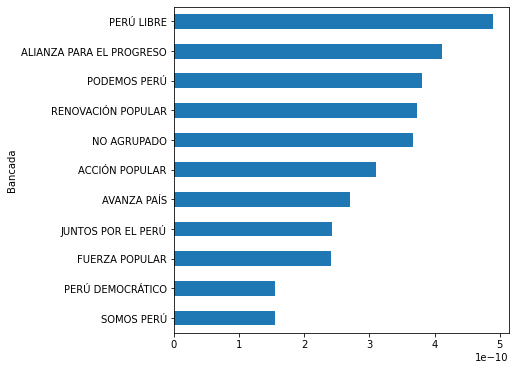

In [9]:
pre_total_rep['rep_abs_dist'] = pre_total_rep['total_rep']/2351793
rep_vs_bancada = pre_total_rep.groupby('Bancada')['rep_abs_dist'].median().sort_values()
rep_vs_bancada.plot(kind='barh', figsize=(6, 6))

## Media de votos por bancada

<AxesSubplot:ylabel='Bancada'>

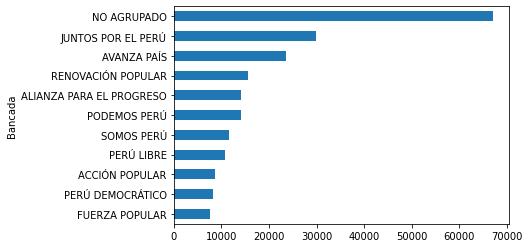

In [10]:
pre_total_rep.groupby('Bancada')['Votación'].median().sort_values().plot(kind='barh')

## Distribución de la representación absoluta distribuida

<AxesSubplot:>

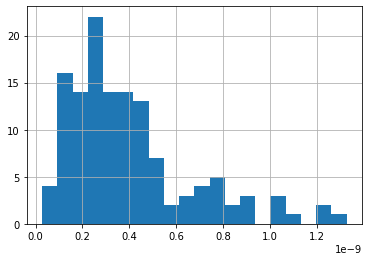

In [11]:
pre_total_rep['rep_abs_dist'].hist(bins=20)

In [12]:
reg_voters = pre_total_rep.groupby('Región')['Votación'].sum()
temp_df = pre_total_rep.rename(columns={'Rep_abs_x':'Rep_abs'}).drop('Rep_abs_y', axis=1)\
             .merge(reg_voters, on='Región', suffixes=('_unit', '_regional'))\
             [['Región', 'Bancada', 'Votación_unit', 'Votación_regional']]
temp_df['rep_intern'] = temp_df['Votación_unit']/temp_df['Votación_regional']
temp_df.groupby('Bancada')['rep_intern'].median().sort_values()
# temp_df.groupby('Región')['rep_intern'].median().sort_values().plot(kind='barh', figsize=(5, 5))

Bancada
SOMOS PERÚ                  0.022385
JUNTOS POR EL PERÚ          0.034959
NO AGRUPADO                 0.052836
PODEMOS PERÚ                0.054802
PERÚ DEMOCRÁTICO            0.072661
AVANZA PAÍS                 0.073067
RENOVACIÓN POPULAR          0.108937
FUERZA POPULAR              0.131354
ACCIÓN POPULAR              0.167848
ALIANZA PARA EL PROGRESO    0.207608
PERÚ LIBRE                  0.257364
Name: rep_intern, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=496b7f65-72e8-4f99-acc9-201d5fae973f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>